# Predict Questions Stack-Overflow

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Data

In [2]:
df = pd.read_csv('./raw-data/train-sample.csv')

## 3. Data Exploratory Analisis

In [3]:
df.shape

(140272, 15)

In [5]:
df.head()

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,6046168,05/18/2011 14:14:05,543315,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,open
1,4873911,02/02/2011 11:30:10,465076,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,open
2,3311559,07/22/2010 17:21:54,406143,07/22/2010 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,enums,NaN,NaN,NaN,open
3,9990413,04/03/2012 09:18:39,851755,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,NaN,NaN,NaN,04/15/2012 21:12:48,too localized
4,10421966,05/02/2012 21:25:01,603588,02/04/2011 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,NaN,NaN,NaN,NaN,open


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140272 entries, 0 to 140271
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   PostId                               140272 non-null  int64 
 1   PostCreationDate                     140272 non-null  object
 2   OwnerUserId                          140272 non-null  int64 
 3   OwnerCreationDate                    140272 non-null  object
 4   ReputationAtPostCreation             140272 non-null  int64 
 5   OwnerUndeletedAnswerCountAtPostTime  140272 non-null  int64 
 6   Title                                140272 non-null  object
 7   BodyMarkdown                         140272 non-null  object
 8   Tag1                                 140262 non-null  object
 9   Tag2                                 113021 non-null  object
 10  Tag3                                 75914 non-null   object
 11  Tag4                      

In [6]:
df.isna().sum()

PostId                                      0
PostCreationDate                            0
OwnerUserId                                 0
OwnerCreationDate                           0
ReputationAtPostCreation                    0
OwnerUndeletedAnswerCountAtPostTime         0
Title                                       0
BodyMarkdown                                0
Tag1                                       10
Tag2                                    27251
Tag3                                    64358
Tag4                                   100622
Tag5                                   124558
PostClosedDate                          70136
OpenStatus                                  0
dtype: int64

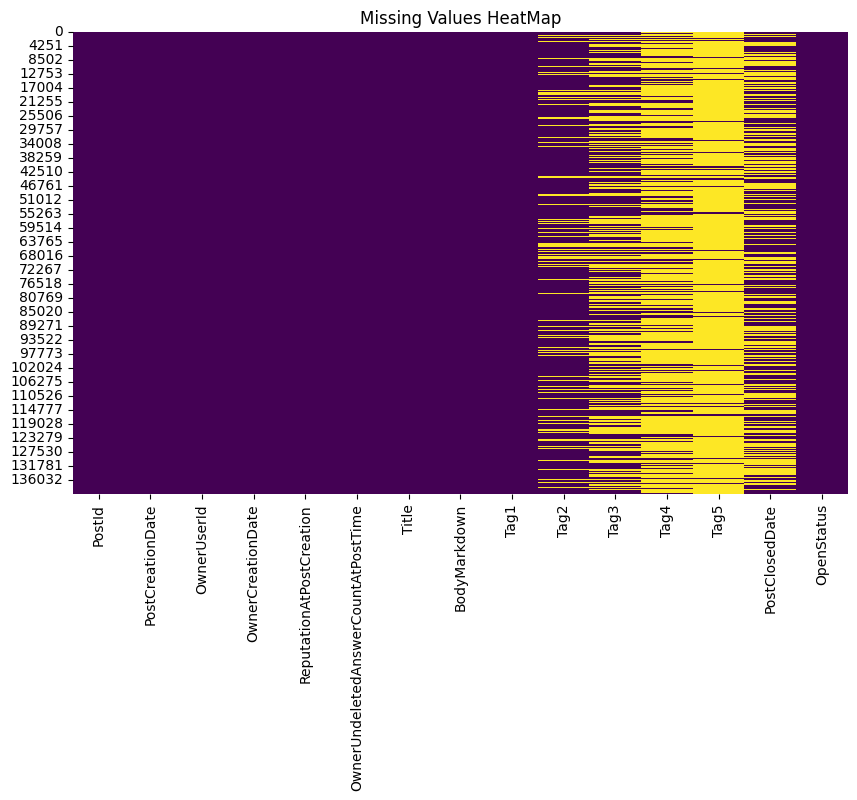

In [15]:
#Check for missing values
missin_values = df.isnull()

plt.figure(figsize=(10,6))
sns.heatmap(missin_values, cbar=False, cmap='viridis')
plt.title('Missing Values HeatMap')
plt.show()

In [3]:
df_temp = df[['Title', 'BodyMarkdown', 'Tag1', 'OpenStatus']].copy()

In [12]:
df_temp.head()

,Title,BodyMarkdown,Tag1,OpenStatus
0,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,open
1,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,open
2,Too many lookup tables,What are the adverse effects of having too man...,sql-server,open
3,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,too localized
4,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,open


In [11]:
df_temp.isna().sum()

Title           0
BodyMarkdown    0
Tag1            0
OpenStatus      0
dtype: int64

In [4]:
df_temp.dropna(inplace=True)

In [13]:
df_temp.shape

(140262, 4)

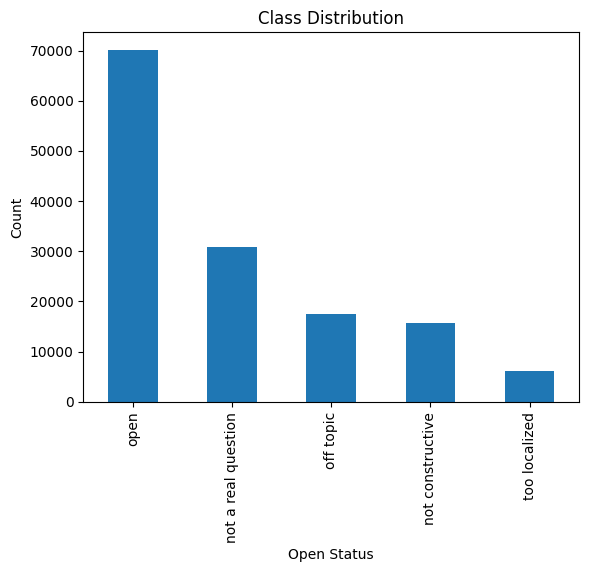

In [14]:
df_temp['OpenStatus'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Open Status')
plt.ylabel('Count')
plt.show()

In [16]:
df_temp['OpenStatus'].unique()

array(['open', 'too localized', 'not a real question', 'off topic',
       'not constructive'], dtype=object)

In [5]:
classes_maping = {
    'open' : 1,
    'too localized' : 2,
    'not a real question' : 3,
    'off topic' : 4,
    'not constructive' : 5
}

In [6]:
df_temp['OpenStatus_Encoded'] = df_temp['OpenStatus'].map(classes_maping)

In [7]:
df_temp.head()

,Title,BodyMarkdown,Tag1,OpenStatus,OpenStatus_Encoded
0,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,open,1
1,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,open,1
2,Too many lookup tables,What are the adverse effects of having too man...,sql-server,open,1
3,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,too localized,2
4,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,open,1


## Hacer Under Sampling

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
X = df_temp.drop('OpenStatus_Encoded', axis=1)
y = df_temp['OpenStatus_Encoded']

In [10]:
rus = RandomUnderSampler(random_state=42)

In [11]:
X_resampled, y_resampled = rus.fit_resample(X, y)

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

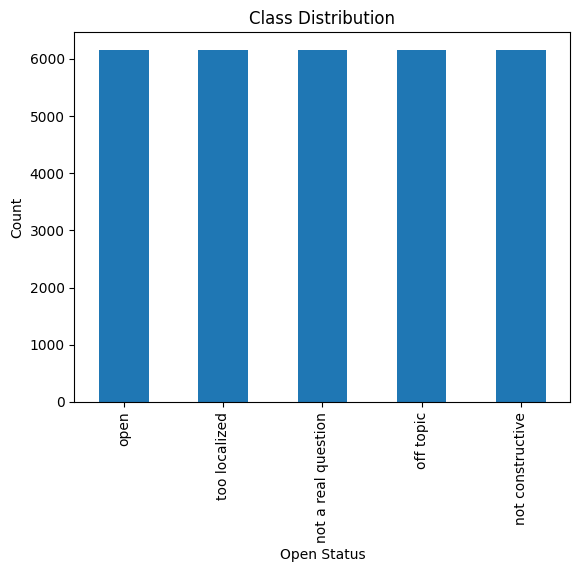

In [12]:
df_resampled['OpenStatus'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Open Status')
plt.ylabel('Count')
plt.show()

In [13]:
df_resampled.head()

,Title,BodyMarkdown,Tag1,OpenStatus,OpenStatus_Encoded
76836,how to create a collection with O(1) complexity,i want to create a data structure or collentio...,java,open,1
94872,"How to use a ""section image"" addable by a user","I need to setup a ""section image"" addable by a...",plone,open,1
34186,Cannot find Izpack 'src' folder,I am trying to get the source for the built i...,java,open,1
19400,How to add multiple menu items with the same t...,As docs say it's impossible to add two menu it...,cocoa,open,1
93636,The type or namespace <blah> does not exist...,"Ok, I have had this one a million times before...",c#,open,1


In [14]:
df_resampled.to_csv("archivo.csv", index=False)

In [3]:
df_prueba = pd.read_csv("archivo.csv")
df_prueba.head()

,Title,BodyMarkdown,Tag1,OpenStatus,OpenStatus_Encoded
0,how to create a collection with O(1) complexity,i want to create a data structure or collentio...,java,open,1
1,"How to use a ""section image"" addable by a user","I need to setup a ""section image"" addable by a...",plone,open,1
2,Cannot find Izpack 'src' folder,I am trying to get the source for the built i...,java,open,1
3,How to add multiple menu items with the same t...,As docs say it's impossible to add two menu it...,cocoa,open,1
4,The type or namespace <blah> does not exist...,"Ok, I have had this one a million times before...",c#,open,1


### Limpieza de Datos

In [6]:
df_prueba.isna().sum()

Title                 0
BodyMarkdown          0
Tag1                  0
OpenStatus            0
OpenStatus_Encoded    0
dtype: int64

In [7]:
df_prueba['OpenStatus'].unique()

array(['open', 'too localized', 'not a real question', 'off topic',
       'not constructive'], dtype=object)

In [6]:
from preprocess import PreprocessData
from cleaners import CleanerDataProcessor

# 1. Preprocesar datos
preprocessor = PreprocessData(text_columns=["Title", "BodyMarkdown"], label_column="OpenStatus")
X, y = preprocessor.transform("archivo.csv")

# Usar solo una muestra (para no explotar la RAM/CPU)
X = X[:10000]
y = y[:10000]


In [8]:
df_prueba.shape

(30785, 5)

In [7]:
print(pd.Series(y).value_counts())

1    6157
2    3843
Name: count, dtype: int64


In [10]:
import re
import string

In [30]:
def clean(text):
#Convertir a minusculas
  text = str(text).lower()

  #Eliminar textos entre corchetes (Ej: etiquetas)
  text = re.sub(r'\[.*?\]', '', text)

  #Eliminar URLS
  text = re.sub(r'https?://\S+|www.\.\S', '', text)

  #Eliminar etiquetas HTML
  text = re.sub(r'<.*?>+', '', text)

  #Eliminar signos de puntuacion
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

  #Eliminar saltos de linea
  text = re.sub(r'\n', ' ', text)

  #Eliminar palabras que contienen números
  text = re.sub(r'\w*\d\w*', '', text)

  #Eliminar emojis y caracteres especiales (no ASCII)
  text = re.sub(r'[^\x00-\x7F]+', '', text)

  #Eliminar espacios extras al inicio y al final
  text = text.strip()

  return text

# Intento de arreglar funcion clean

In [11]:
import re
import string

def clean(text):
    # Convertir a minúsculas
    text = str(text).lower()

    # Eliminar texto entre corchetes (etiquetas tipo [duplicate])
    text = re.sub(r'\[.*?\]', '', text)

    # Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>+', '', text)

    # Eliminar puntuación, pero conservar signos útiles (ej: '?')
    punctuation = string.punctuation.replace('?', '')
    text = re.sub(r'[%s]' % re.escape(punctuation), '', text)

    # Eliminar saltos de línea
    text = re.sub(r'\n', ' ', text)

    # (Opcional) Eliminar palabras con números — solo si realmente molesta
    # text = re.sub(r'\w*\d\w*', '', text)

    # Eliminar caracteres no ASCII (emojis, símbolos raros)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Eliminar espacios extra
    text = text.strip()

    return text


### Lemmatizacion

In [12]:
import nltk
from nltk.corpus import stopwords

#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

In [13]:
import spacy

# !python -m spacy download en_core_web_sm

nlp_en = spacy.load('en_core_web_sm')

In [14]:
def lemmtized_stopwords(txt):
    clean_data = clean(txt)
    doc_en = nlp_en(clean_data)
    lemmatized = [token.lemma_ for token in doc_en if token.text.lower() not in stop_words]
    return ' '.join(lemmatized).strip()

In [15]:
df_resampled['Text_Complete'] = df_resampled['Title'].str.cat(df_resampled['BodyMarkdown'], sep=" ")

In [16]:
df_resampled.head()

,Title,BodyMarkdown,Tag1,OpenStatus,OpenStatus_Encoded,Text_Complete
32914,Why does github offer two download methods?,Github allows you to clone a public repository...,github,open,1,Why does github offer two download methods? Gi...
39495,Pass variable to another view,I'm trying to set a variable in another view.\...,iphone,open,1,Pass variable to another view I'm trying to se...
55479,Accessing the Direct3D device inside VMR9,I have a video decoder filter that lives insid...,video,open,1,Accessing the Direct3D device inside VMR9 I ha...
136136,How to crop a UIImage by selecting an area,I'm searching for a posibility to crop UIImage...,objective-c,open,1,How to crop a UIImage by selecting an area I'm...
118057,Collecting Data from NDFD SOAP response,I have written a small app that retrieves data...,soap,open,1,Collecting Data from NDFD SOAP response I have...


In [17]:
df_resampled['clean_text'] = df_resampled['Text_Complete'].apply(lemmtized_stopwords)

In [18]:
df_resampled.to_pickle('df_text_clean_test1.pkl')

## Train Test Split 

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_clean = df_resampled.drop('OpenStatus_Encoded', axis=1)
y_clean = df_resampled['OpenStatus_Encoded']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)

(21549, 6)
(9236, 6)


### Bag Of Words (BOW) & TFI-DF

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#### Bag of Words (Bow)

In [47]:
cnc_vec = CountVectorizer(ngram_range=(1,2), max_features=3000)
bow_train = cnc_vec.fit_transform(X_train['clean_text'])
bow_test = cnc_vec.transform(X_test['clean_text'])

In [48]:
print(bow_train.shape)
print(bow_test.shape)

(21549, 3000)
(9236, 3000)


#### TFI-DF

In [49]:
tfi_vec = TfidfVectorizer(ngram_range=(1,2), max_features=3000)
tfi_train = tfi_vec.fit_transform(X_train['clean_text'])
tfi_test = tfi_vec.transform(X_test['clean_text'])

In [50]:
print(tfi_train.shape)
print(tfi_test.shape)

(21549, 3000)
(9236, 3000)


### Model Training

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

## SGD Classifier

In [53]:
SGD = SGDClassifier()

### HyperPAramaters Tunning

In [54]:
params_SGD = {
    'loss' : ['hinge', 'log', 'perceptron'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'learning_rate' : ['constant', 'optimal']
}

In [55]:
random_search_SGD_Classifier = RandomizedSearchCV(
    estimator=SGD,
    param_distributions=params_SGD,
    n_iter=20,
    cv = 5,
    random_state=42
)

In [56]:
y_train.head()

137541    5
79243     1
7624      5
129961    3
7911      3
Name: OpenStatus_Encoded, dtype: int64

In [19]:
df_resampled.head()

,Title,BodyMarkdown,Tag1,OpenStatus,OpenStatus_Encoded,Text_Complete,clean_text
32914,Why does github offer two download methods?,Github allows you to clone a public repository...,github,open,1,Why does github offer two download methods? Gi...,github offer two download method ? github allo...
39495,Pass variable to another view,I'm trying to set a variable in another view.\...,iphone,open,1,Pass variable to another view I'm trying to se...,pass variable another view try set variable an...
55479,Accessing the Direct3D device inside VMR9,I have a video decoder filter that lives insid...,video,open,1,Accessing the Direct3D device inside VMR9 I ha...,access direct3d device inside vmr9 video decod...
136136,How to crop a UIImage by selecting an area,I'm searching for a posibility to crop UIImage...,objective-c,open,1,How to crop a UIImage by selecting an area I'm...,crop uiimage select area search posibility cro...
118057,Collecting Data from NDFD SOAP response,I have written a small app that retrieves data...,soap,open,1,Collecting Data from NDFD SOAP response I have...,collect datum ndfd soap response write small a...


✅ 2. Aumenta max_iter

Para evitar los warnings de convergencia, puedes subir el límite:

SGDClassifier(max_iter=2000, ...)

In [20]:
columns = ['clean_text', 'OpenStatus_Encoded']
df_reasmpled_clean = df_resampled[columns]

In [22]:
df_reasmpled_clean.tail()

,clean_text,OpenStatus_Encoded
20812,well practice er modeling ? develop twitter ba...,5
31865,light php tool serve sql datum javascript via ...,5
74363,exeption management need information good prac...,5
134586,example program realize performance gain use m...,5
127055,prerequisite write net web service ? new web d...,5


## Bow training

In [57]:
random_search_SGD_Classifier.fit(bow_train, y_train)

print('Mejores Parametros: ', random_search_SGD_Classifier.best_params_)
print('Mejor Score: ', random_search_SGD_Classifier.best_score_)

/home/mateo/miniconda3/envs/py3.10/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mateo/miniconda3/envs/py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
65 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mateo/miniconda3/envs/py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/ho

Mejores Parametros:  {'penalty': 'l2', 'loss': 'hinge', 'learning_rate': 'optimal', 'alpha': 0.01}
Mejor Score:  0.5240611594251281


In [59]:
best_model_SGD_Classifier_Bow = random_search_SGD_Classifier.best_estimator_

#Evaluar en el et de test
preds_cv_SGD_Classifier_Bow = best_model_SGD_Classifier_Bow.predict(bow_test)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [64]:
accuracy_SGD_Bow = accuracy_score(y_test, preds_cv_SGD_Classifier_Bow)
#precission_SGD_Bow = precision_score(y_test, preds_cv_SGD_Classifier_Bow),
#recall_SGD_Bow = recall_score(y_test, preds_cv_SGD_Classifier_Bow)
#f1_SGD_Bow = f1_score(y_test, preds_cv_SGD_Classifier_Bow)
cf_SGD_Bow = confusion_matrix(y_test, preds_cv_SGD_Classifier_Bow)

In [65]:
print('accuracy_score: ', accuracy_SGD_Bow)
print(cf_SGD_Bow)

accuracy_score:  0.5255521870939801
[[ 787  381  268  220  191]
 [ 353  866  285  251  121]
 [ 246  305  751  271  293]
 [ 125  101   90 1141  371]
 [  98   61  138  213 1309]]


In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, preds_cv_SGD_Classifier_Bow))

              precision    recall  f1-score   support

           1       0.49      0.43      0.46      1847
           2       0.51      0.46      0.48      1876
           3       0.49      0.40      0.44      1866
           4       0.54      0.62      0.58      1828
           5       0.57      0.72      0.64      1819

    accuracy                           0.53      9236
   macro avg       0.52      0.53      0.52      9236
weighted avg       0.52      0.53      0.52      9236

